In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.linear_model import LogisticRegression

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

sns.set_palette("pastel")

## Анализ

In [3]:
df = pd.read_csv('Airline Quality Ratings.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


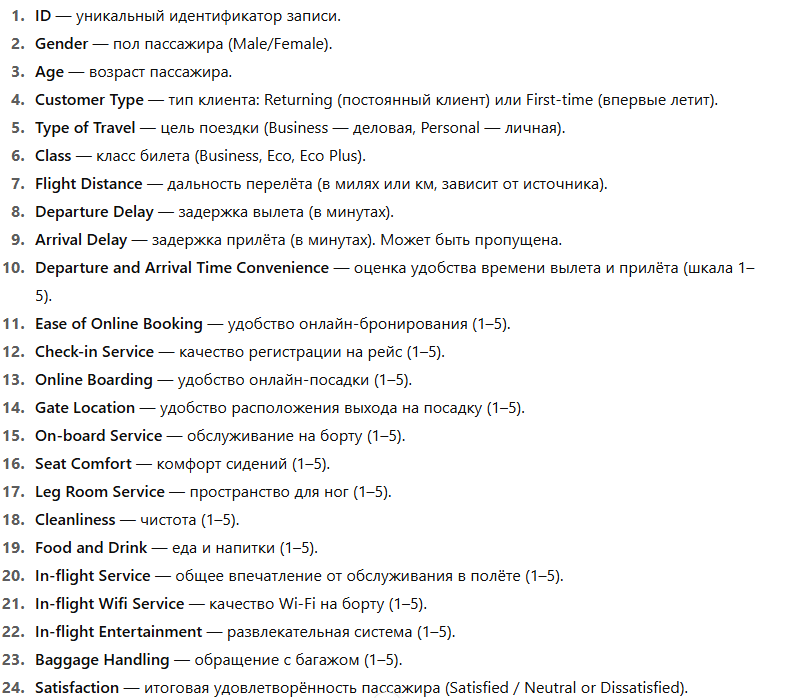

In [9]:
df = df.drop(columns=["ID"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
On-board Service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0


In [12]:
df.duplicated().sum()

np.int64(0)

In [39]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n================ {col} ================")
    print(df[col].value_counts())


================ Gender ================
Gender
Female    65899
Male      63981
Name: count, dtype: int64

================ Customer Type ================
Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

================ Type of Travel ================
Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

================ Class ================
Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

================ Satisfaction ================
Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64


In [41]:
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [42]:
df = df.dropna()

In [43]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [45]:
df.shape

(129487, 23)

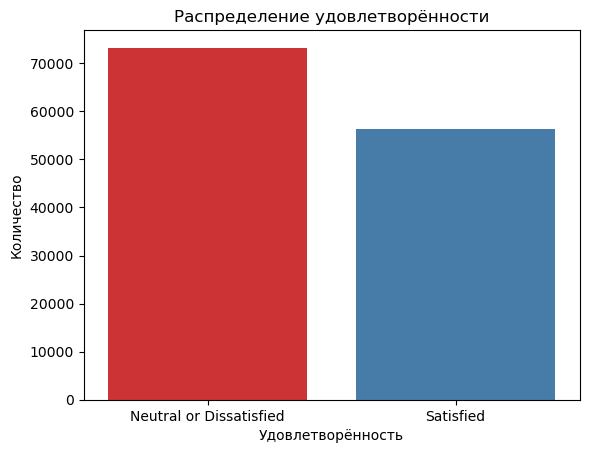

In [46]:
sns.countplot(x='Satisfaction', data=df, hue='Satisfaction', palette='Set1')
plt.title('Распределение удовлетворённости')
plt.xlabel('Удовлетворённость')
plt.ylabel('Количество')
plt.show()

In [47]:
df['Satisfaction'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})
df['Satisfaction']

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129487, dtype: int64

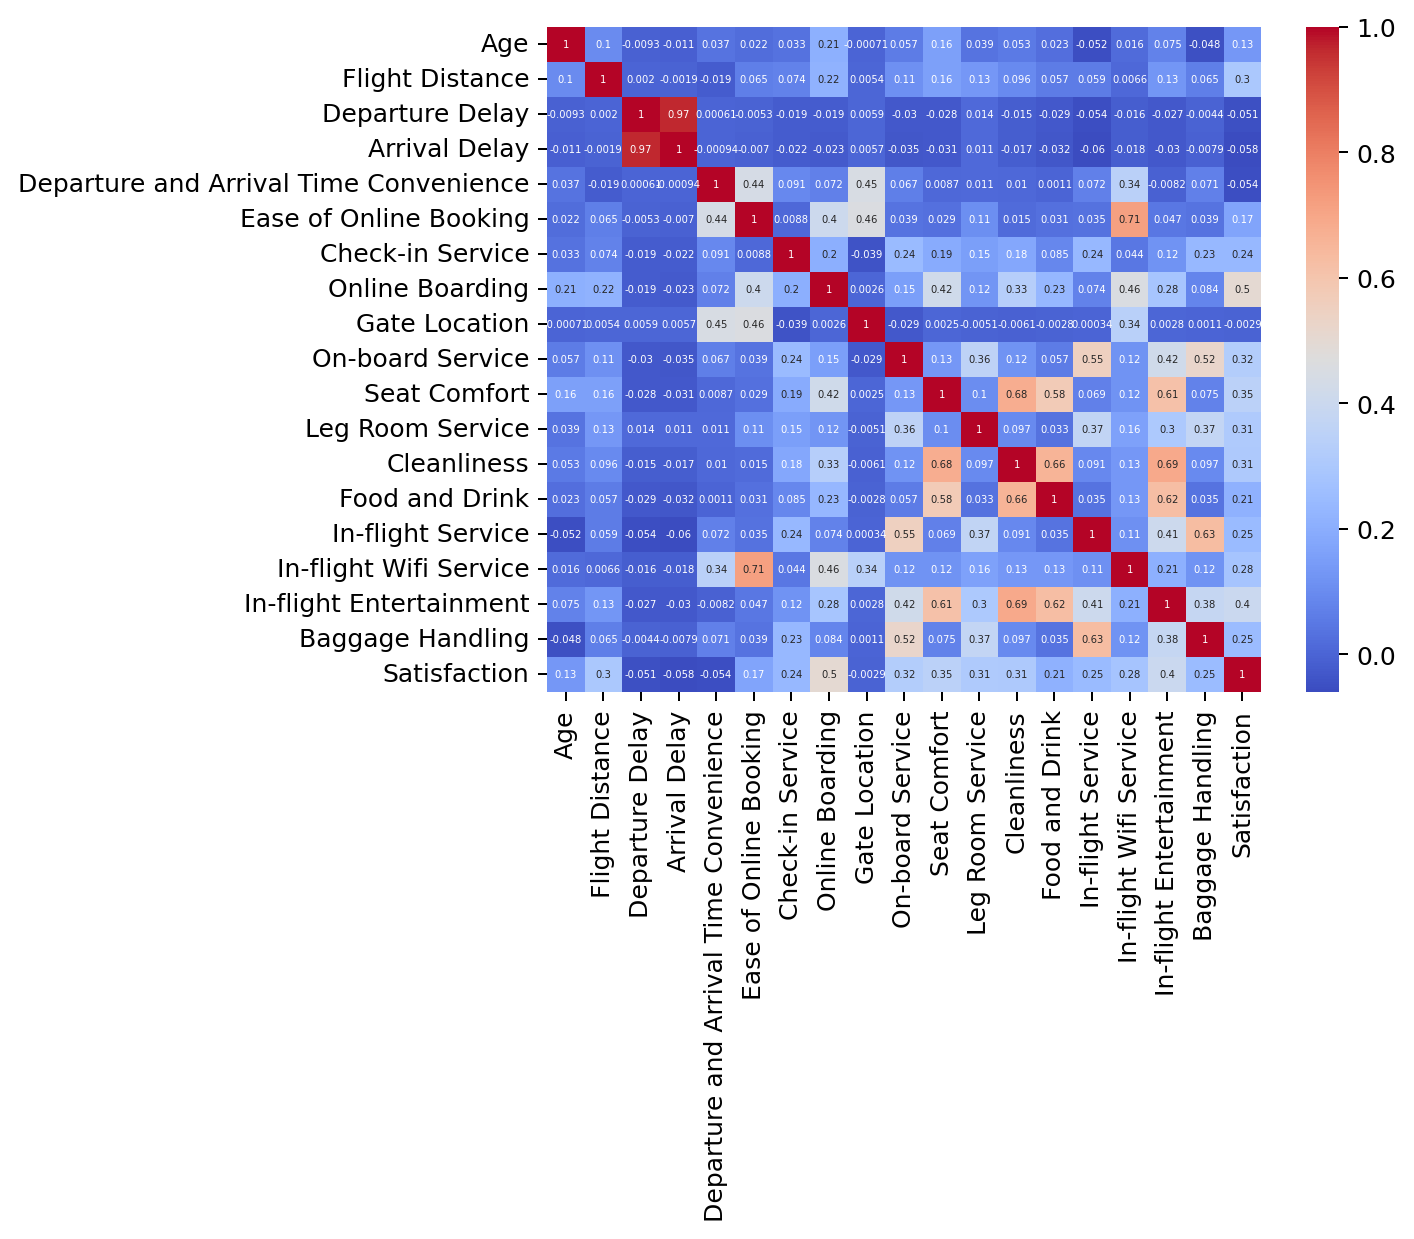

In [48]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(dpi=180)
sns.heatmap(corr, annot=True, annot_kws={'size':4}, cmap='coolwarm')
plt.show()

## Модели

In [49]:
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129487 non-null  object 
 1   Age                                     129487 non-null  int64  
 2   Customer Type                           129487 non-null  object 
 3   Type of Travel                          129487 non-null  object 
 4   Class                                   129487 non-null  object 
 5   Flight Distance                         129487 non-null  int64  
 6   Departure Delay                         129487 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129487 non-null  int64  
 9   Ease of Online Booking                  129487 non-null  int64  
 10  Check-in Service                        129487 no

In [51]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [52]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [55]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
prep_X_train = preprocessor.fit_transform(X_train)
prep_X_test = preprocessor.transform(X_test)

In [59]:
features_name = preprocessor.get_feature_names_out()
features_name

array(['num__Age', 'num__Flight Distance', 'num__Departure Delay',
       'num__Arrival Delay',
       'num__Departure and Arrival Time Convenience',
       'num__Ease of Online Booking', 'num__Check-in Service',
       'num__Online Boarding', 'num__Gate Location',
       'num__On-board Service', 'num__Seat Comfort',
       'num__Leg Room Service', 'num__Cleanliness', 'num__Food and Drink',
       'num__In-flight Service', 'num__In-flight Wifi Service',
       'num__In-flight Entertainment', 'num__Baggage Handling',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__Customer Type_First-time', 'cat__Customer Type_Returning',
       'cat__Type of Travel_Business', 'cat__Type of Travel_Personal',
       'cat__Class_Business', 'cat__Class_Economy',
       'cat__Class_Economy Plus'], dtype=object)

In [60]:
len(features_name)

27

## Вспомогательные функции

In [134]:
def print_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Функция для расчета и вывода метрик
    """
    accuracy = accuracy_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print('Метрики:')
    print(f'accuracy = {accuracy:.5f}')
    print(f'log_loss = {loss:.5f}')
    print(f'f1 = {f1:.5f}')
    
    return accuracy, loss, f1

In [135]:
import pandas as pd

def add_model_results(model_name: str,
                      accuracy: float,
                      log_loss_val: float,
                      f1: float,
                      results_df: pd.DataFrame) -> pd.DataFrame:
    """
    Добавляет результаты модели в существующий DataFrame.

    Args:
        model_name (str): Название модели.
        accuracy (float): Значение accuracy.
        log_loss_val (float): Значение log_loss.
        f1 (float): Значение f1.
        results_df (pd.DataFrame): DataFrame, куда добавляются результаты.

    Returns:
        pd.DataFrame: Обновлённый DataFrame.
    """
    new_row = pd.DataFrame([{
        "Model": model_name,
        "Accuracy": round(accuracy, 5),
        "LogLoss": round(log_loss_val, 5),
        "f1": round(f1, 5)
    }])
    
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    return results_df


In [137]:
results = pd.DataFrame(columns=["Model", "Accuracy", "LogLoss", "f1"]) \
          .astype({"Model": "str", "Accuracy": "float", "LogLoss": "float", "f1": "float"})

## Логистическая регрессия

In [142]:
log_model = LogisticRegression()
log_model.fit(prep_X_train, y_train)

y_log_pred = log_model.predict(prep_X_test)
accuracy_lr, loss_lr, f1_ls = print_metrics(y_test, y_log_pred)

Метрики:
accuracy = 0.87169
log_loss = 4.62480
f1 = 0.84913


In [143]:
results = add_model_results("Logistic Regression", accuracy_lr, loss_lr, f1_ls, results)

## XGBoost

In [144]:
from xgboost import XGBClassifier

In [145]:
xgb_space = {
    "n_estimators": hp.quniform("n_estimators", 300, 800, 50),
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.5),
    "max_depth": hp.quniform("max_depth", 3, 10, 1)
}

In [146]:
def objective(params):
    xgb = XGBClassifier(
        n_estimators=int(params["n_estimators"]),
        learning_rate=float(params["learning_rate"]),
        max_depth=int(params["max_depth"]),
        random_state=42,
        n_jobs=-1
    )
    
    xgb.fit(prep_X_train, y_train)

    y_xgb_pred = xgb.predict(prep_X_test)

    accuracy = accuracy_score(y_test, y_xgb_pred)
    
    return {"loss": accuracy, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest,
            max_evals=10, trials=trials, rstate=np.random.default_rng(42))

best


100%|██████████| 10/10 [00:11<00:00,  1.14s/trial, best loss: 0.9608077843848946]


{'learning_rate': np.float64(0.4431240464815816),
 'max_depth': np.float64(7.0),
 'n_estimators': np.float64(700.0)}

In [147]:
xgb = XGBClassifier(
        n_estimators=int(best["n_estimators"]),
        learning_rate=float(best["learning_rate"]),
        max_depth=int(best["max_depth"]),
        random_state=42,
        n_jobs=-1
    )

xgb.fit(prep_X_train, y_train)
y_xgb_pred = xgb.predict(prep_X_test)

accuracy_xgb, loss_xgb, f1_xgb = print_metrics(y_test, y_xgb_pred)

Метрики:
accuracy = 0.96081
log_loss = 1.41263
f1 = 0.95434


In [148]:
results = add_model_results("XGBClassifier", accuracy_xgb, loss_xgb, f1_xgb, results)

## Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf_space = {
    "n_estimators": hp.quniform("n_estimators", 200, 800, 50),
    "max_depth": hp.choice("max_depth", [None, 6, 8, 10, 12, 16, 20]),
    "min_samples_split": hp.qloguniform("min_samples_split", np.log(2), np.log(100), 1),
    "min_samples_leaf": hp.qloguniform("min_samples_leaf",  np.log(1), np.log(50),  1),
    "max_features": hp.choice("max_features", ["sqrt", "log2", 0.3, 0.5, 0.7]),
}

In [151]:
def objective(params):
    rf_model = RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        max_depth=params["max_depth"],
        min_samples_split=int(params["min_samples_split"]),
        min_samples_leaf=int(params["min_samples_leaf"]),
        max_features=params["max_features"],
        n_jobs=-1,
        random_state=42
    )
    
    rf_model.fit(prep_X_train, y_train)
    y_rf_pred = rf_model.predict(prep_X_test)

    accuracy = accuracy_score(y_test, y_rf_pred)
    return {"loss": accuracy, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=rf_space, algo=tpe.suggest,
            max_evals=10, trials=trials, rstate=np.random.default_rng(42))

best

100%|██████████| 10/10 [01:43<00:00, 10.39s/trial, best loss: 0.9342420264113059]


{'max_depth': np.int64(1),
 'max_features': np.int64(2),
 'min_samples_leaf': np.float64(11.0),
 'min_samples_split': np.float64(3.0),
 'n_estimators': np.float64(300.0)}

In [152]:
rf_model = RandomForestClassifier(
        n_estimators=int(best["n_estimators"]),
        max_depth=best["max_depth"],
        min_samples_split=int(best["min_samples_split"]),
        min_samples_leaf=int(best["min_samples_leaf"]),
        max_features=best["max_features"],
        n_jobs=-1,
        random_state=42
    )

rf_model.fit(prep_X_train, y_train)

y_rf_pred = rf_model.predict(prep_X_test)

accuracy_rf, loss_rf, f1_rf = print_metrics(y_test, y_rf_pred)

Метрики:
accuracy = 0.82914
log_loss = 6.15851
f1 = 0.76606


In [153]:
results = add_model_results("Random Forest", accuracy_rf, loss_rf, f1_rf, results)

## CatBoost

In [154]:
from catboost import CatBoostClassifier

In [162]:
cat_space = {
    "depth": hp.quniform("depth", 4, 10, 1),
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.5),
    "random_strength": hp.uniform("random_strength", 0.0, 1.0),
    "border_count": hp.quniform("border_count", 32, 100, 1),
    "iterations": hp.quniform("iterations", 400, 800, 100),
}

In [163]:
def objective(params):
    cat_model = CatBoostClassifier(
        iterations=int(params["iterations"]),
        depth=int(params["depth"]),
        learning_rate=float(params["learning_rate"]),
        random_strength=float(params["random_strength"]),
        border_count=int(params["border_count"]),
        random_state=42
    )
    
    cat_model.fit(prep_X_train, y_train)
    y_cat_pred = cat_model.predict(prep_X_test)

    accuracy = accuracy_score(y_test, y_cat_pred)
    return {"loss": accuracy, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=cat_space, algo=tpe.suggest,
            max_evals=10, trials=trials, rstate=np.random.default_rng(42))

best

0:	learn: 0.3505169	total: 16.6ms	remaining: 13.3s    

1:	learn: 0.2016923	total: 42.9ms	remaining: 17.1s    

2:	learn: 0.1744289	total: 61.5ms	remaining: 16.3s    

3:	learn: 0.1562654	total: 78.8ms	remaining: 15.7s    

4:	learn: 0.1401451	total: 96.4ms	remaining: 15.3s    

5:	learn: 0.1267595	total: 115ms	remaining: 15.2s     

6:	learn: 0.1223207	total: 133ms	remaining: 15s       

7:	learn: 0.1164889	total: 149ms	remaining: 14.8s     

8:	learn: 0.1120973	total: 167ms	remaining: 14.7s     

9:	learn: 0.1098580	total: 186ms	remaining: 14.7s     

10:	learn: 0.1059220	total: 205ms	remaining: 14.7s    

11:	learn: 0.1031184	total: 224ms	remaining: 14.7s    

12:	learn: 0.1001608	total: 242ms	remaining: 14.6s    

13:	learn: 0.0984236	total: 264ms	remaining: 14.8s    

14:	learn: 0.0973754	total: 283ms	remaining: 14.8s    

15:	learn: 0.0960766	total: 302ms	remaining: 14.8s    

16:	learn: 0.0934991	total: 319ms	remaining: 14.7s    

17:	learn: 0.0923791	total: 336ms	remaining: 14.

{'border_count': np.float64(42.0),
 'depth': np.float64(6.0),
 'iterations': np.float64(700.0),
 'learning_rate': np.float64(0.4167439198625154),
 'random_strength': np.float64(0.06428686330954925)}

In [164]:
cat_model = CatBoostClassifier(
        iterations=int(best["iterations"]),
        depth=int(best["depth"]),
        learning_rate=float(best["learning_rate"]),
        random_strength=float(best["random_strength"]),
        border_count=int(best["border_count"]),
        random_state=42
    )

cat_model.fit(prep_X_train, y_train)

y_cat_pred = cat_model.predict(prep_X_test)

accuracy_cat, loss_cat, f1_cat = print_metrics(y_test, y_cat_pred)

0:	learn: 0.3288530	total: 12.3ms	remaining: 8.58s
1:	learn: 0.2260064	total: 23.7ms	remaining: 8.27s
2:	learn: 0.1788656	total: 34ms	remaining: 7.9s
3:	learn: 0.1564182	total: 46.6ms	remaining: 8.11s
4:	learn: 0.1464402	total: 56.9ms	remaining: 7.9s
5:	learn: 0.1388458	total: 67ms	remaining: 7.75s
6:	learn: 0.1332183	total: 77.7ms	remaining: 7.69s
7:	learn: 0.1280367	total: 88.7ms	remaining: 7.67s
8:	learn: 0.1228104	total: 98.8ms	remaining: 7.59s
9:	learn: 0.1189258	total: 110ms	remaining: 7.56s
10:	learn: 0.1138634	total: 121ms	remaining: 7.55s
11:	learn: 0.1080975	total: 132ms	remaining: 7.55s
12:	learn: 0.1067961	total: 145ms	remaining: 7.65s
13:	learn: 0.1058100	total: 156ms	remaining: 7.63s
14:	learn: 0.1034628	total: 167ms	remaining: 7.64s
15:	learn: 0.1001332	total: 179ms	remaining: 7.67s
16:	learn: 0.0993292	total: 193ms	remaining: 7.75s
17:	learn: 0.0972942	total: 204ms	remaining: 7.74s
18:	learn: 0.0958485	total: 214ms	remaining: 7.68s
19:	learn: 0.0949454	total: 226ms	rema

In [165]:
results = add_model_results("CatBoost", accuracy_cat, loss_cat, f1_cat, results)

## Таблица с результатами

In [170]:
results

,Model,Accuracy,LogLoss,f1
1,Logistic Regression,0.87169,4.62480,0.84913
2,XGBClassifier,0.96081,1.41263,0.95434
3,Random Forest,0.82914,6.15851,0.76606
4,CatBoost,0.96089,1.40985,0.95447


## Выбрала XGBClassifier

In [198]:
def fi_to_score_1_5(model, X_train_transformed, X_infer_transformed):
    """
    Переводит признаки в непрерывный скор 1..5 с использованием feature importance.
    Делает min–max масштабирование по train и применяет его к набору.

    Args:
        model: XGBClassifier | CatBoost | RandomForest
        X_train_transformed (np.ndarray): матрица train ПОСЛЕ препроцессинга
        X_infer_transformed  (np.ndarray): матрица для скоров

    Returns:
        np.ndarray: скоры в диапазоне [1, 5] для X_infer_transformed
    """
    fi = model.feature_importances_
    raw_train = X_train_transformed @ fi
    raw_infer = X_infer_transformed @ fi

    raw_min = float(raw_train.min())
    raw_max = float(raw_train.max())

    scaled = 1 + 4 * (raw_infer - raw_min) / (raw_max - raw_min)

    return scaled

In [178]:
score_test_fi  = fi_to_score_1_5(xgb, prep_X_train, prep_X_test)

In [179]:
score_test_fi

array([2.45730592, 2.98243215, 2.35710371, ..., 3.58011396, 4.20426369,
       4.0665599 ])

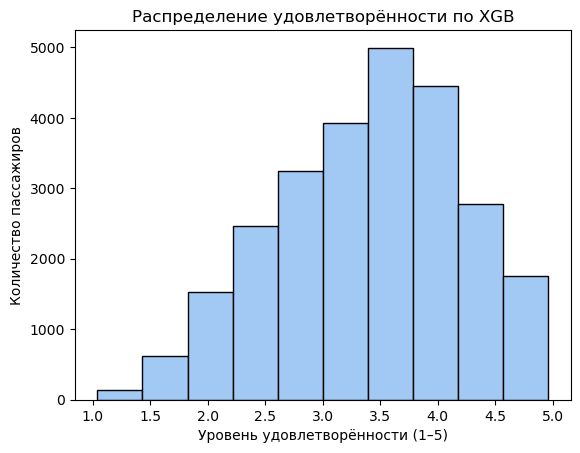

In [202]:
plt.hist(score_test_fi, edgecolor="black")
plt.title("Распределение удовлетворённости по XGB")
plt.xlabel("Уровень удовлетворённости (1–5)")
plt.ylabel("Количество пассажиров")
plt.show()

In [203]:
score_test_fi_cat = fi_to_score_1_5(cat_model, prep_X_train, prep_X_test)
score_test_fi_cat

array([2.07952072, 2.72976887, 1.93114984, ..., 3.03152433, 3.38689852,
       3.01295382])

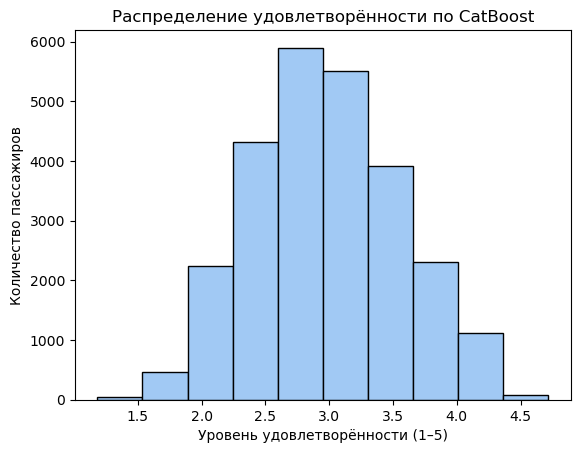

In [204]:
plt.hist(score_test_fi_cat, edgecolor="black")
plt.title("Распределение удовлетворённости по CatBoost")
plt.xlabel("Уровень удовлетворённости (1–5)")
plt.ylabel("Количество пассажиров")
plt.show()

In [205]:
score_test_fi_rf = fi_to_score_1_5(rf_model, prep_X_train, prep_X_test)
score_test_fi_rf

array([1.81303289, 2.98716316, 2.39191694, ..., 2.81289035, 3.24469708,
       2.60970883])

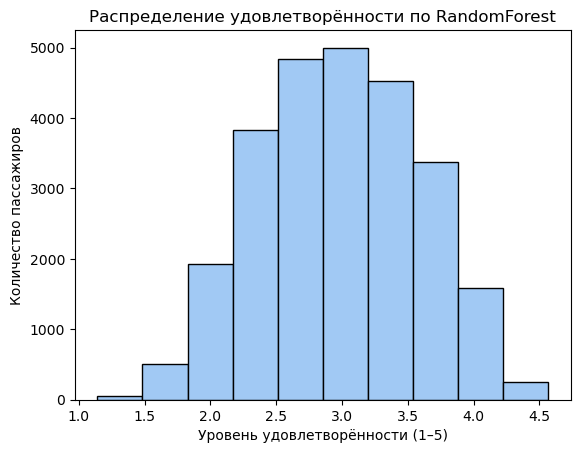

In [213]:
plt.hist(score_test_fi_rf, edgecolor="black")
plt.title("Распределение удовлетворённости по RandomForest")
plt.xlabel("Уровень удовлетворённости (1–5)")
plt.ylabel("Количество пассажиров")
plt.show()

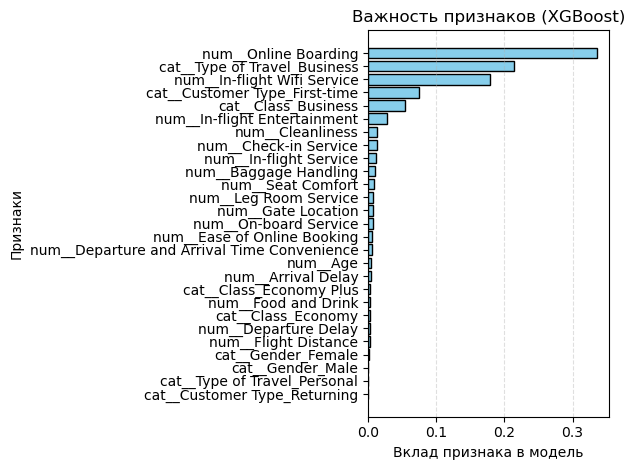

In [217]:
feature_names = preprocessor.get_feature_names_out()
importances = xgb.feature_importances_

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=True)

plt.barh(fi_df['feature'], fi_df['importance'], color='skyblue', edgecolor='black')
plt.title('Важность признаков (XGBoost)')
plt.xlabel('Вклад признака в модель')
plt.ylabel('Признаки')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

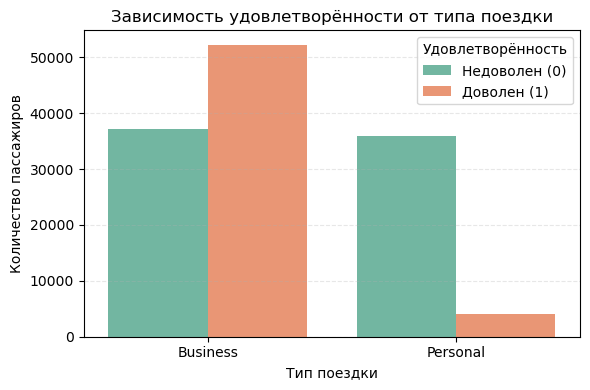

In [219]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type of Travel', hue='Satisfaction', palette='Set2')

plt.title('Зависимость удовлетворённости от типа поездки')
plt.xlabel('Тип поездки')
plt.ylabel('Количество пассажиров')
plt.legend(title='Удовлетворённость', labels=['Недоволен (0)', 'Доволен (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()